In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('display.max_columns',None)


from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(15,5)
%config InlineBackend.figure_format = 'png'
%matplotlib inline

Грузим чеки и магазины

In [2]:
#Грузим Магазины 
df_oos = pd.read_excel("./oss.xlsx")

In [4]:
df_oos.fillna(0, inplace = True)

In [8]:
df_oos

,Unnamed: 0,id_tt,id_tov,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,name_tov,name_gr
0,0,11290,52,0.0,0.456088,0.0,0.0,0.000000,0.00000,0.0,Сметана 25%,Молочная Продукция
1,1,11357,52,0.0,0.000000,0.0,0.0,0.333222,0.00000,0.0,Сметана 25%,Молочная Продукция
2,2,11783,52,0.0,0.000000,0.0,0.0,0.194407,0.00000,0.0,Сметана 25%,Молочная Продукция
3,3,11956,52,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,Сметана 25%,Молочная Продукция
4,4,12348,52,0.0,0.000000,0.0,0.0,0.000000,0.20829,0.0,Сметана 25%,Молочная Продукция
...,...,...,...,...,...,...,...,...,...,...,...,...
44434,44434,15986,65284,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,Стейк Рамп CarneBravo вес.,Мясная Витрина ВВ
44435,44435,15986,65368,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,"№ 1050 подложка ""Привезем бесплатно даже на Дачу""",Рекламные материалы
44436,44436,15986,65520,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,"Торт ""Пломбирный"" Айс","Торты, десерты замороженные"
44437,44437,15986,65945,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,Томаты коктейльные на ветке,Овощи. Фрукты. Грибы. Зелень


In [10]:
df_oos['dopost'] = df_oos[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].mean(axis = 1)

In [12]:
df_oos.groupby()

,Unnamed: 0,id_tt,id_tov,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,name_tov,name_gr,dopost
0,0,11290,52,0.0,0.456088,0.0,0.0,0.000000,0.00000,0.0,Сметана 25%,Молочная Продукция,0.065155
1,1,11357,52,0.0,0.000000,0.0,0.0,0.333222,0.00000,0.0,Сметана 25%,Молочная Продукция,0.047603
2,2,11783,52,0.0,0.000000,0.0,0.0,0.194407,0.00000,0.0,Сметана 25%,Молочная Продукция,0.027772
3,3,11956,52,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,Сметана 25%,Молочная Продукция,0.000000
4,4,12348,52,0.0,0.000000,0.0,0.0,0.000000,0.20829,0.0,Сметана 25%,Молочная Продукция,0.029756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44434,44434,15986,65284,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,Стейк Рамп CarneBravo вес.,Мясная Витрина ВВ,0.000000
44435,44435,15986,65368,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,"№ 1050 подложка ""Привезем бесплатно даже на Дачу""",Рекламные материалы,0.000000
44436,44436,15986,65520,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,"Торт ""Пломбирный"" Айс","Торты, десерты замороженные",0.000000
44437,44437,15986,65945,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,Томаты коктейльные на ветке,Овощи. Фрукты. Грибы. Зелень,0.000000


In [14]:
df_cat_dopost = df_oos.groupby(["id_tt", "name_gr"], as_index=False)["dopost"].mean()

In [19]:
df_cat_dopost

,id_tt,name_gr,dopost
0,11290,Айс ВкусВилл,0.000000
1,11290,Алкоголь,0.905741
2,11290,Архив,0.000000
3,11290,Бакалея,1.732281
4,11290,Бытовая Химия,1.661130
...,...,...,...
398,15986,"Торты, десерты замороженные",0.632111
399,15986,"Торты, пирожные, десерты",3.236404
400,15986,Фрешбар,0.000000
401,15986,Хлеб,10.820614


In [26]:
df_cat_dopost2 = df_cat_dopost[df_cat_dopost["name_gr"].isin({'Молочная Продукция','Кулинария','Мясо. Птица. П/ф охл. Яйца','Овощи. Фрукты. Грибы. Зелень','Торты, пирожные, десерты'})]

In [31]:
df_cat_dopost2['dopost2'] = df_cat_dopost2.loc['dopost'].div(2)

KeyError: 'dopost'

In [32]:
df_cat_dopost2

,id_tt,name_gr,dopost,dopost2
13,11290,Кулинария,9.405663,4.702832
19,11290,Молочная Продукция,4.942226,2.471113
23,11290,Мясо. Птица. П/ф охл. Яйца,4.662311,2.331155
25,11290,Овощи. Фрукты. Грибы. Зелень,16.620681,8.310341
41,11290,"Торты, пирожные, десерты",4.548062,2.274031
55,11357,Кулинария,3.682772,1.841386
61,11357,Молочная Продукция,8.498391,4.249196
64,11357,Мясо. Птица. П/ф охл. Яйца,6.060545,3.030272
67,11357,Овощи. Фрукты. Грибы. Зелень,8.968810,4.484405
82,11357,"Торты, пирожные, десерты",3.258199,1.629100


In [34]:
df_cat_dopost3 = df_cat_dopost2.pivot_table(index='id_tt', columns = 'name_gr', values='dopost2', aggfunc='mean')

In [35]:
df_cat_dopost3.head(1)

name_gr,Кулинария,Молочная Продукция,Мясо. Птица. П/ф охл. Яйца,Овощи. Фрукты. Грибы. Зелень,"Торты, пирожные, десерты"
id_tt,,,,,
11290,4.702832,2.471113,2.331155,8.310341,2.274031


<AxesSubplot:xlabel='id_tt', ylabel='name_gr'>

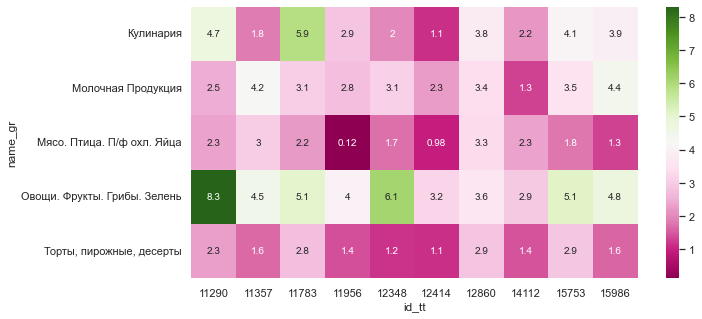

In [44]:

plt.figure(figsize=(10, 5))
sns.heatmap(df_cat_dopost3.transpose(), cmap='PiYG',annot=True)